In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import timeit
from rpl import RadarSignalProcessing
import sys
# 导入DBReader的目录
sys.path.append('D:/RADIal_Project/DBReader')
from DBReader.DBReader import SyncReader

## 1. Load the dataset

In [2]:
root_folder = 'D:/RADIal_Project/RADIal/raw_sequences/RECORD@2020-11-22_12.28.47'
db = SyncReader(root_folder,tolerance=40000)

-------------------------------------------------------------------------
- Sensors available:
-     camera
-     can
-     gps
-     radar_ch0
-     radar_ch1
-     radar_ch2
-     radar_ch3
-     scala
-
- You might use function "setSensorFilters" to select sensors you want to read!
-------------------------------------------------------------------------
Total tolerance errors:  0.4424778761061947 %
Total corrupted frames:  1.7699115044247788 %


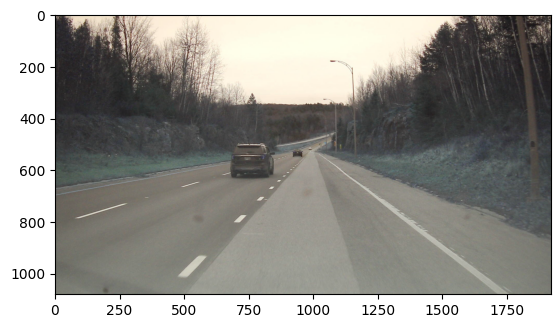

In [15]:
sample = db.GetSensorData(68)
plt.imshow(sample['camera']['data'])

## 2. RadarSignalProcessing to compute Point Cloud 

In [4]:
RSP = RadarSignalProcessing('D:/RADIal_Project/SignalProcessing/CalibrationTable.npy',method='PC')

CPU will be used to execute the processing


In [5]:
%time pc=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: total: 781 ms
Wall time: 382 ms


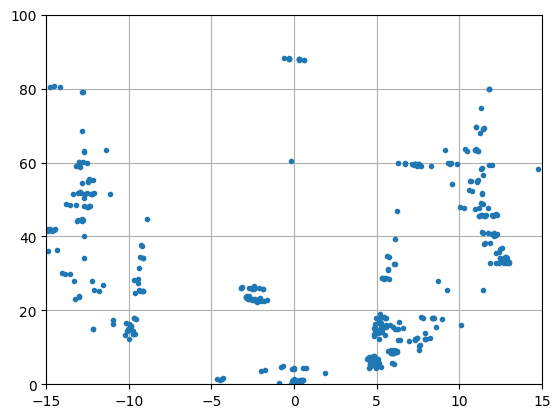

In [13]:
# PC = [Range,Doppler,Azimuth,Elevation]
Az = pc[:,2]
R = pc[:,0]
El = pc[:,3]
z = R*np.sin(El)
El_cos = np.cos(El)
x = R*El_cos*np.cos(Az)
y = R*El_cos*np.sin(Az)
v = pc[:,1]

plt.plot(-y,x,'.')
plt.xlim(-15,15)
plt.ylim(0,100)
plt.grid()

## 3. RadarSignalProcessing to compute Doppler Spectrums

In [7]:
RSP = RadarSignalProcessing('D:/RADIal_Project/SignalProcessing/CalibrationTable.npy',method='RD')

CPU will be used to execute the processing


In [8]:
%time rd=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: total: 219 ms
Wall time: 192 ms


(512, 256, 16) It has 16 channels, one for each Rx antenna


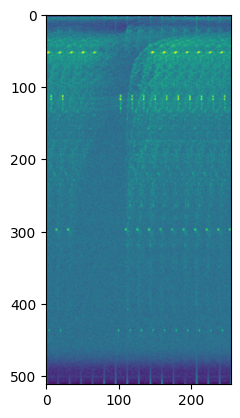

In [14]:
print(rd.shape,'It has 16 channels, one for each Rx antenna')
plt.imshow(np.log10(np.sum(np.abs(rd),axis=2)))

## 4. RadarSignalProcessing to compute Range-Azimuth map

### 4.1 Using CuPy

In [10]:
RSP = RadarSignalProcessing('D:/RADIal_Project/SignalProcessing/CalibrationTable.npy',method='RA',device='cuda',lib='CuPy')

old computer have no GPUs


In [11]:
%time ra=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

old computer have no GPUs
CPU times: total: 875 ms
Wall time: 1.16 s


TypeError: Image data of dtype object cannot be converted to float

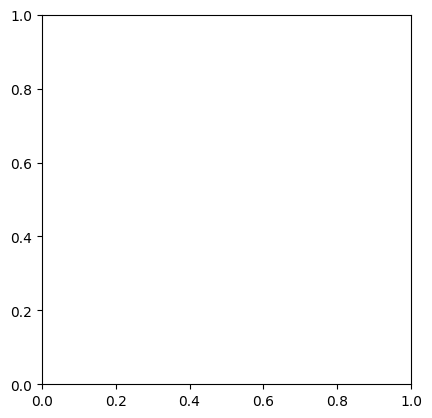

In [12]:
plt.imshow(ra)

### 4.2 Using PyTorch

In [13]:
RSP = RadarSignalProcessing('D:/RADIal_Project/SignalProcessing/CalibrationTable.npy',method='RA',device='cuda',lib='PyTorch')

old computer have no GPUs


In [14]:
%time ra=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

old computer have no GPUs
CPU times: total: 781 ms
Wall time: 808 ms


TypeError: Image data of dtype object cannot be converted to float

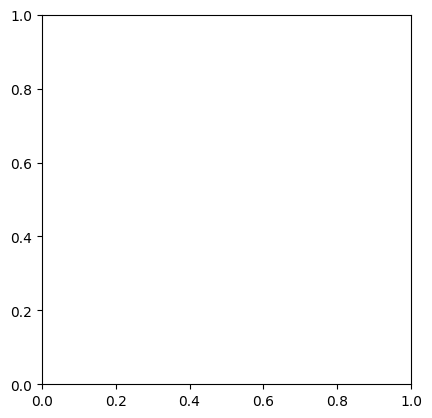

In [15]:
plt.imshow(ra)

### 4.3 Using CPU

In [10]:
RSP = RadarSignalProcessing('D:/RADIal_Project/SignalProcessing/CalibrationTable.npy',method='RA',device='cpu')

CPU will be used to execute the processing


In [11]:
%time ra=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: total: 9.34 s
Wall time: 4.23 s


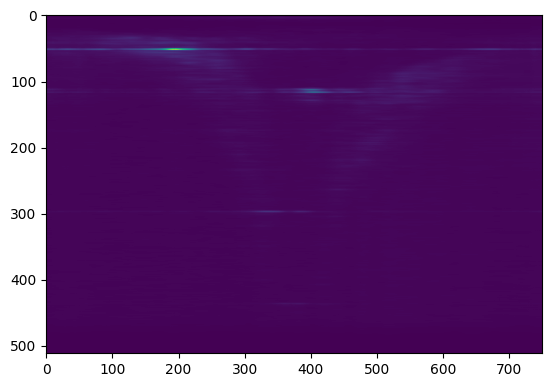

In [12]:
plt.imshow(ra)